In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# rcParams['figure.figsize'] = 10,6

C:\Users\ayush\anaconda3\envs\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ayush\anaconda3\envs\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ayush\anaconda3\envs\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ayush\anaconda3\envs\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ayush\anaconda3\envs\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may

In [4]:
df = pd.read_csv('./perrin-freres-monthly-champagne.csv')

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.columns=['Month','Sales']

In [8]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [9]:
df = df.dropna()

In [10]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [11]:
type(df['Month'][0])

str

In [12]:
# Convering String to Timestamp
df['Month'] = pd.to_datetime(df['Month'])
indexedDataset = df.copy()
indexedDataset.set_index(['Month'], inplace=True)

In [13]:
indexedDataset.index.year

Int64Index([1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964,
            ...
            1971, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972],
           dtype='int64', name='Month', length=105)

In [14]:
indexedDataset

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [15]:
df_all = indexedDataset['Sales']

In [16]:
df_all

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: Sales, Length: 105, dtype: float64

In [17]:
df_train = indexedDataset[indexedDataset.index.year != 1972]['Sales']
df_test = indexedDataset[indexedDataset.index.year == 1972]['Sales']

print('train examples: ', df_train.shape[0])
print('test examples: ', df_test.shape[0])

train examples:  96
test examples:  9


In [18]:
df_train

Month
1964-01-01     2815.0
1964-02-01     2672.0
1964-03-01     2755.0
1964-04-01     2721.0
1964-05-01     2946.0
               ...   
1971-08-01     1659.0
1971-09-01     5951.0
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
Name: Sales, Length: 96, dtype: float64

In [19]:
indexedDataset.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [20]:
# Visualization

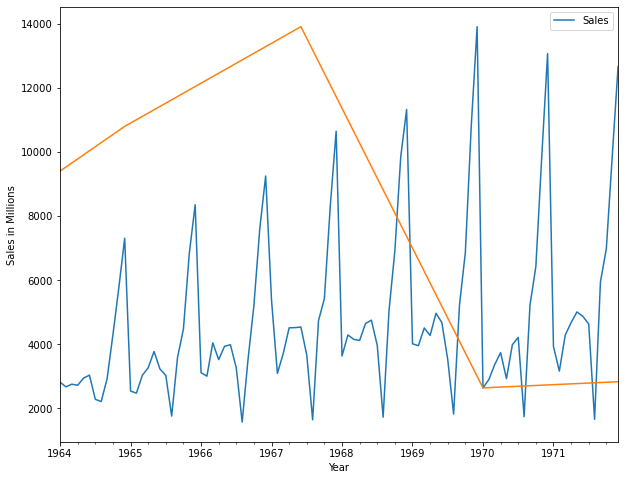

In [21]:
# Plotting Graph
df_train.plot(figsize=(10,8))
plt.xlabel('Year')
plt.legend()
plt.ylabel('Sales in Millions')
plt.plot(df_train)

The graph clearly says thet it is seasonal. Repeating Peaks and geting higher and higher. 


Let's plot the graph into trend, seasonality and residuals.

In [22]:
import statsmodels.api as sm

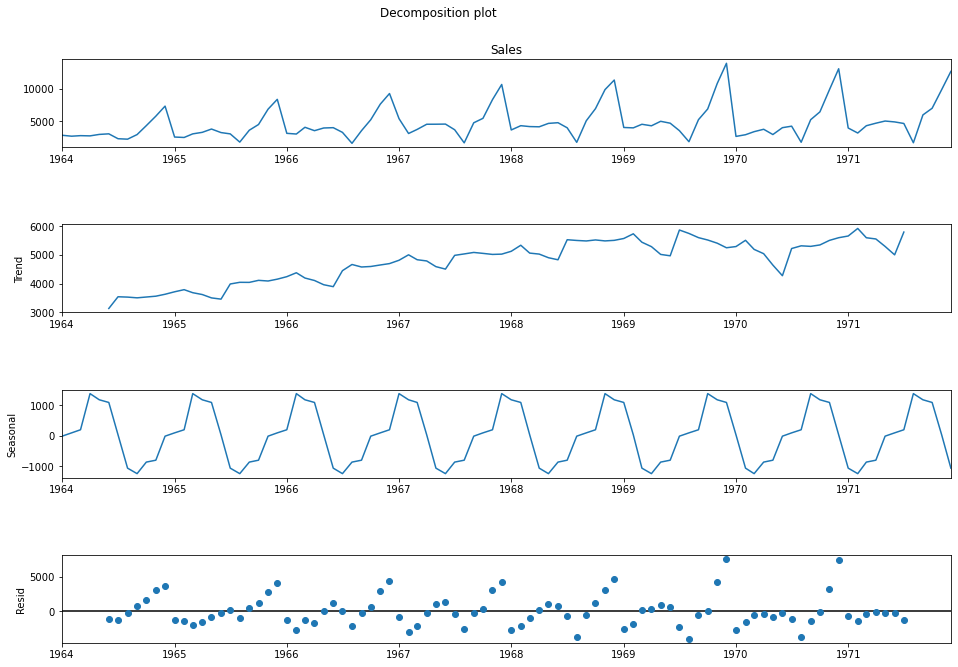

In [23]:
decomposition = sm.tsa.seasonal_decompose(df_train, model='additive', freq = 11)
fig = decomposition.plot()
fig.set_size_inches(15,10)
fig.suptitle('Decomposition plot')
plt.show()

In [24]:
from IPython.display import display, HTML

In [25]:
# Determining Rolling Statistics and Plotting data
def make_plot(series,window, title = ''):
    rollmean = series.rolling(window=12).mean()
    rollstd = series.rolling(window =12).std()
    plt.figure(figsize = (8,5))
    series.plot()
    rollmean.plot(label = 'rolling mean')
    rollstd.plot(label = 'rolling std')
    plt.ylabel('Sales in millions')
    plt.title(title)
    plt.legend()
    plt.show()

In [26]:
# Performing Augmented Dicky Fuller(ADFC) Test
from statsmodels.tsa.stattools import adfuller

In [27]:
def stationarity(timeseries):
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

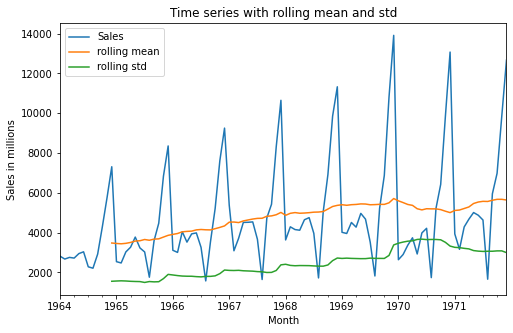

In [28]:
make_plot(df_train, 12, 'Time series with rolling mean and std')

The plot shows that the rolling mean as well as the standard deviation is not constant, this gives us a hint of non-stationarity. Let us confirm it by using the Dicky Fuller Test.

In [29]:
stationarity(df_train)

Dickey-Fuller Test: 
Test Statistic          -1.620557
p-value                  0.472437
Lags Used               11.000000
No. of Obs              84.000000
Critical Value (1%)     -3.510712
Critical Value (5%)     -2.896616
Critical Value (10%)    -2.585482
dtype: float64


In [30]:
# Here p-value is not less than 0.05. Also, Critical Value is also not greater that test statistic
# Making the data stationary and then again checking its stationarity
# First we will try with differencing

In [31]:
seasonal_diff_df = df_train - df_train.shift(12)
seasonal_diff_df.dropna(inplace=True)

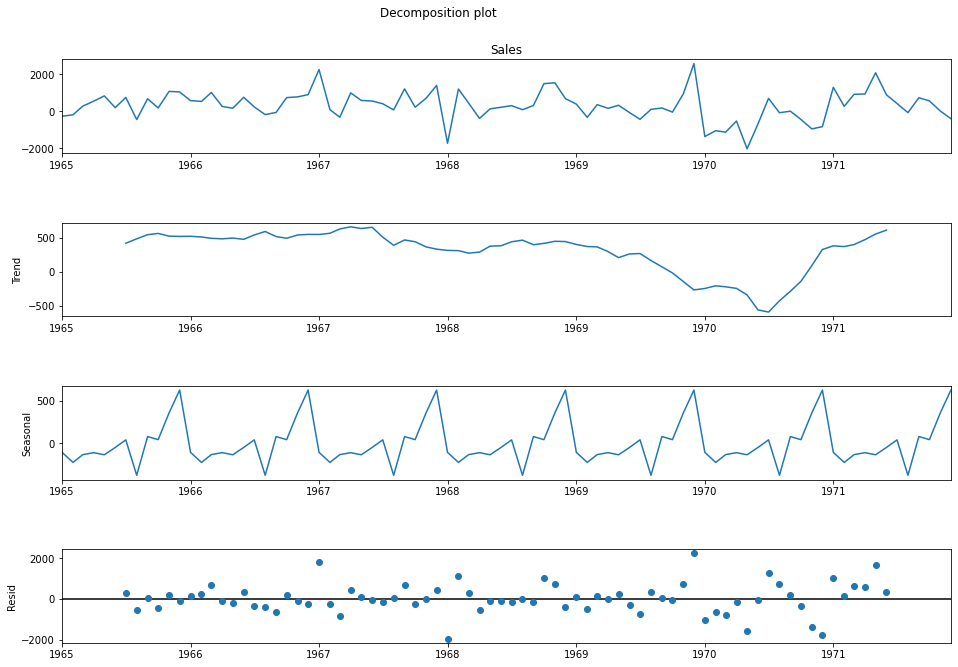

In [32]:
decomposition = sm.tsa.seasonal_decompose(seasonal_diff_df, model='additive', freq = 12)
fig = decomposition.plot()
fig.set_size_inches(15,10)
fig.suptitle('Decomposition plot')
plt.show()

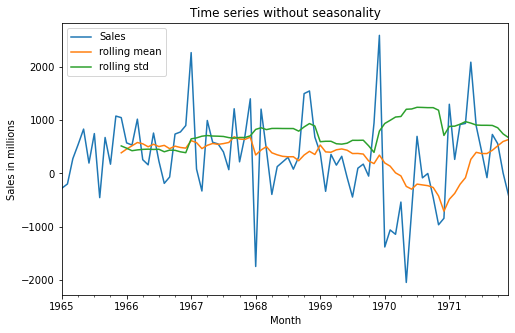

In [33]:
make_plot(seasonal_diff_df,12, 'Time series without seasonality')

In [34]:
stationarity(seasonal_diff_df)

Dickey-Fuller Test: 
Test Statistic         -7.218206e+00
p-value                 2.145345e-10
Lags Used               0.000000e+00
No. of Obs              8.300000e+01
Critical Value (1%)    -3.511712e+00
Critical Value (5%)    -2.897048e+00
Critical Value (10%)   -2.585713e+00
dtype: float64


In [36]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [37]:
df_acf = acf(seasonal_diff_df,nlags=40)
df_pacf = pacf(seasonal_diff_df,nlags =40)

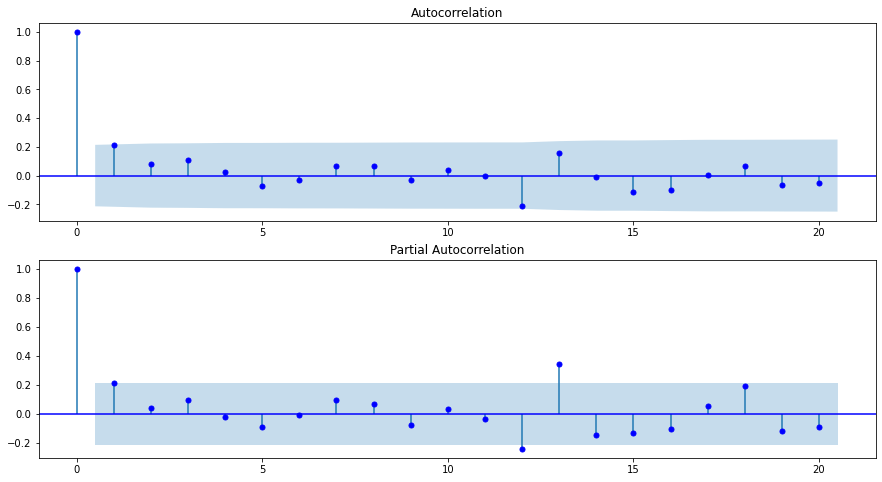

In [38]:
plt.figure(figsize = (15,8))
plt.subplot(211)
plot_acf(seasonal_diff_df, ax=plt.gca(), color ='blue')
plt.subplot(212)
plot_ f(seasonal_diff_df, ax=plt.gca(),  color ='blue')
plt.show()

As you can see, that there are only a few significant values in both the ACF and the PACF. Both the PACF and ACF drop off suddenly, perhaps suggesting a mix of AR and MA models. All this is insignificant for us as we will try a bunch of different parameters and choose the one with lower RMSE(root mean square error)

We define a function to take the seasonal difference for a series to remove the seasonality.

As the model will predict values for non-seasonal data we need to add back the seasonal components we subtracted to get the true predictions. We define a function called inverse_seas_diff to inverse the seasonal difference of the series.

In [39]:
def inverse_seas_diff(original, value, interval):
#     print("Modified Original===> {} Value===> {} result===> {}".format(original.iloc[-interval], value, value + original.iloc[-interval]))
    return value + original.iloc[-interval]

def make_seas_diff(original, interval):
    seasonal_diff_df = original - original.shift(interval)
    seasonal_diff_df.dropna(inplace  =True)
    return list(seasonal_diff_df)

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
def rmse(order):
    
    train_list = list(df_train)
    predictions = []
    for index,true_value in df_test.iteritems(): 
        seasonal_diff_df = make_seas_diff(pd.Series(train_list),12)
        model = ARIMA(seasonal_diff_df, order=order)
        results_AR = model.fit(trend = 'nc',disp=0)
        pred = results_AR.forecast()[0][0]
        pred = inverse_seas_diff(pd.Series(train_list),pred,12)
        train_list.append(true_value)
        predictions.append(pred)
        
    return ('RMSE: ', mean_squared_error(list(df_test), predictions) ** 0.5)

In [42]:
import itertools
p = range(0,5)
d = range(0,3)
q = range(0,5)
combinations = list(itertools.product(p,d,q))

for parameter in combinations:
    try:
        order = parameter
        print(order,':', rmse(order))
    except:
        continue

(0, 1, 1) : ('RMSE: ', 350.7972148806868)
(0, 1, 2) : ('RMSE: ', 360.3714935921581)
(0, 1, 3) : ('RMSE: ', 361.8949242280253)
(0, 1, 4) : ('RMSE: ', 369.8309178775916)
(0, 2, 1) : ('RMSE: ', 504.4348896517765)
(0, 2, 2) : ('RMSE: ', 339.58593313740107)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(0, 2, 3) : ('RMSE: ', 344.57629503614896)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(0, 2, 4) : ('RMSE: ', 346.98509395627553)
(1, 1, 0) : ('RMSE: ', 421.256241030661)
(1, 1, 1) : ('RMSE: ', 363.48135821938405)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', 

(1, 1, 2) : ('RMSE: ', 366.18846386998547)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 3) : ('RMSE: ', 364.98326762921414)
(1, 2, 0) : ('RMSE: ', 711.9525322984255)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 0) : ('RMSE: ', 370.77752810063873)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', 

(2, 1, 1) : ('RMSE: ', 372.1811816152726)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 3) : ('RMSE: ', 331.6874439137294)
(2, 2, 0) : ('RMSE: ', 614.0126992773409)
(2, 2, 1) : ('RMSE: ', 372.06615495149373)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', 

(3, 1, 0) : ('RMSE: ', 348.1395655168495)
(3, 1, 1) : ('RMSE: ', 364.96003726631534)
(3, 1, 2) : ('RMSE: ', 365.4515444914876)
(3, 2, 0) : ('RMSE: ', 534.555788111056)
(3, 2, 1) : ('RMSE: ', 350.2608578904708)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params ava

(4, 1, 0) : ('RMSE: ', 337.3632943308375)
(4, 1, 1) : ('RMSE: ', 366.205894662769)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', 

(4, 1, 2) : ('RMSE: ', 343.9832056092194)


C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ayush\anaconda3\envs\env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(4, 1, 3) : ('RMSE: ', 507.06116057676115)
(4, 2, 0) : ('RMSE: ', 451.71648258764424)
(4, 2, 1) : ('RMSE: ', 340.71441806426674)


RMSE:  350.7972148806868


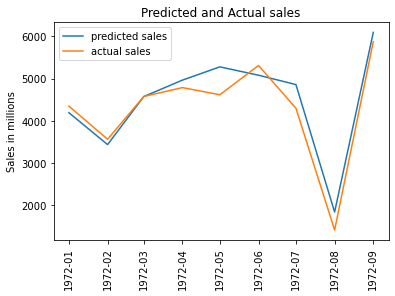

In [43]:
train_list = list(df_train)
predictions = []
for index,true_value in df_test.iteritems(): 
    seasonal_diff_df = make_seas_diff(pd.Series(train_list),12)
    model = ARIMA(seasonal_diff_df, order= (0,1,1))
    results_AR = model.fit(trend = 'nc',disp=0)
    pred = results_AR.forecast()[0][0]
    pred = inverse_seas_diff(pd.Series(train_list),pred,12)
    train_list.append(true_value)
    predictions.append(pred)

print ('RMSE: ', mean_squared_error(list(df_test), predictions) ** 0.5)

pred_series =  pd.Series(predictions, index = df_test.index)
plt.plot(pred_series, label = 'predicted sales')
plt.plot(df_test, label = 'actual sales')
plt.xticks(rotation = 'vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()

In [44]:
train_list = list(df_train)
seasonal_diff_df = make_seas_diff(pd.Series(train_list),12)
model = ARIMA(seasonal_diff_df, order= (0,1,1))
model.fit = model.fit(trend = 'nc',disp=0)

In [45]:
model.fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   83
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -673.199
Method:                       css-mle   S.D. of innovations            797.556
Date:                Tue, 13 Oct 2020   AIC                           1350.399
Time:                        18:33:51   BIC                           1355.236
Sample:                             1   HQIC                          1352.342
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y     -0.9058      0.119     -7.643      0.000      -1.138      -0.674
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.1040           +0.0000j            1.1040            0.0000
-----------------------------------------------------------------------------
"""

## Predicting for next 2 Years

In [46]:
from pandas.tseries.offsets import DateOffset
future_dates=[indexedDataset.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [47]:
future_dates_df=pd.DataFrame({"Month":future_dates,"Sales":np.nan})

In [48]:
future_dates_df

,Month,Sales
0,1972-09-01,NaN
1,1972-10-01,NaN
2,1972-11-01,NaN
3,1972-12-01,NaN
4,1973-01-01,NaN
5,1973-02-01,NaN
6,1973-03-01,NaN
7,1973-04-01,NaN
8,1973-05-01,NaN
9,1973-06-01,NaN


In [49]:
future_dates_df['Month'] = pd.to_datetime(future_dates_df['Month'])
future_indexedDataset = future_dates_df.copy()
future_indexedDataset.set_index(['Month'], inplace=True)

In [50]:
future_indexedDataset

,Sales
Month,
1972-09-01,NaN
1972-10-01,NaN
1972-11-01,NaN
1972-12-01,NaN
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,NaN
1973-04-01,NaN
1973-05-01,NaN


In [51]:
df_future=future_indexedDataset['Sales']

In [52]:
len(df_future)

24

In [53]:
len(list(df_all))

105

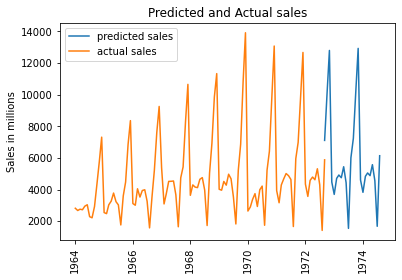

In [54]:
train_list = list(df_all)
predictions = []
for index,true_value in df_future.iteritems(): 
    seasonal_diff_df = make_seas_diff(pd.Series(train_list),12)
    model = ARIMA(seasonal_diff_df, order= (0,1,1))
    results_AR = model.fit(trend = 'nc',disp=0)
    pred = results_AR.forecast()[0][0]
    pred = inverse_seas_diff(pd.Series(train_list),pred,12)
    train_list.append(pred)
    predictions.append(pred)

pred_series =  pd.Series(predictions, index = df_future.index)
plt.plot(pred_series, label = 'predicted sales')
plt.plot(df_all, label = 'actual sales')
plt.xticks(rotation = 'vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()